# MLOPS project - Model design

Author : **Nicolas Deronsart**

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

from spacy.lang.fr.stop_words import STOP_WORDS as french_stopwords

import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

Before training a first model, we need to preprocess the training set to make it usable by the model.  

First we load the dataset.

In [2]:
df = pd.read_csv('../data/train.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,film-url,review,polarity
0,http://www.allocine.fr/film/fichefilm-135259/c...,Si vous cherchez du cinéma abrutissant à tous ...,0
1,http://www.allocine.fr/film/fichefilm-172430/c...,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,http://www.allocine.fr/film/fichefilm-15105/cr...,"Et si, dans les 5 premières minutes du film, l...",0
3,http://www.allocine.fr/film/fichefilm-188629/c...,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,http://www.allocine.fr/film/fichefilm-23514/cr...,"Premier film de la saga Kozure Okami, ""Le Sabr...",1
...,...,...,...
159995,http://www.allocine.fr/film/fichefilm-132387/c...,Un rythme bien trop lent et un Ashton Kutcher ...,0
159996,http://www.allocine.fr/film/fichefilm-53313/cr...,Monsieur Duchovny vous êtes aussi piètre acteu...,0
159997,http://www.allocine.fr/film/fichefilm-248258/c...,Complètement différent des films de la série C...,1
159998,http://www.allocine.fr/film/fichefilm-268731/c...,Alors franchement pour le moment c'est le meil...,1


Then, we use the TF-IDF vectorizer to transform the text of the reviews into a vector of numbers in order to use it to train the model.

In [3]:
tfidf = TfidfVectorizer(stop_words=list(french_stopwords))
X_train = tfidf.fit_transform(df['review'])
X_train.shape

/Users/deronsart/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn(


(160000, 152189)

In [4]:
y_train = df['polarity']
y_train.shape

(160000,)

Now, we can use the vectorized text to train a first model.

## Model conception

Let's try first with a classic Logistic Regression model.

In [5]:
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

Now, we have to evaluate the model. To do so we are going to use the validation set.

In [6]:
df_valid = pd.read_csv('../data/valid.csv')
df_valid

,Unnamed: 0,film-url,review,polarity
0,0,http://www.allocine.fr/film/fichefilm-51895/cr...,Ce film est tout ce qu'il y a de plus sympa. M...,0
1,1,http://www.allocine.fr/film/fichefilm-272/crit...,"The Wall a été réalisé par Alan Parker (Fame, ...",1
2,2,http://www.allocine.fr/film/fichefilm-60134/cr...,"Encore un film majeur tres mal distribué, comm...",1
3,3,http://www.allocine.fr/film/fichefilm-31396/cr...,L'idée est très bonne mais le film manque de r...,0
4,4,http://www.allocine.fr/film/fichefilm-135195/c...,Un petit nanar rigolo a regarder. A voir une f...,0
...,...,...,...,...
19995,19995,http://www.allocine.fr/film/fichefilm-39142/cr...,Ce petit film tourné en 18 jours pour la somme...,1
19996,19996,http://www.allocine.fr/film/fichefilm-8171/cri...,"Le roman de Forsyth, d'où est tiré le scénario...",0
19997,19997,http://www.allocine.fr/film/fichefilm-228026/c...,"Qu'on aime ou pas ""Toni Erdmann"" - et au sorti...",1
19998,19998,http://www.allocine.fr/film/fichefilm-219994/c...,"Un film qui a fait un certain buzz médiatique,...",1


In [7]:
X_valid = tfidf.transform(df_valid['review'])
y_valid = df_valid['polarity']
X_valid.shape, y_valid.shape

((20000, 152189), (20000,))

We then evaluate the model on the validation set using sklearn.metrics functions.

In [8]:
def evaluate(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    
    accuracy = accuracy_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'F1: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'ROC AUC: {roc_auc}')
    
    cm = confusion_matrix(y_valid, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

Accuracy: 0.9185
F1: 0.9178344591188627
Precision: 0.9065923122883888
Recall: 0.9293589220089833
ROC AUC: 0.9187170933055501


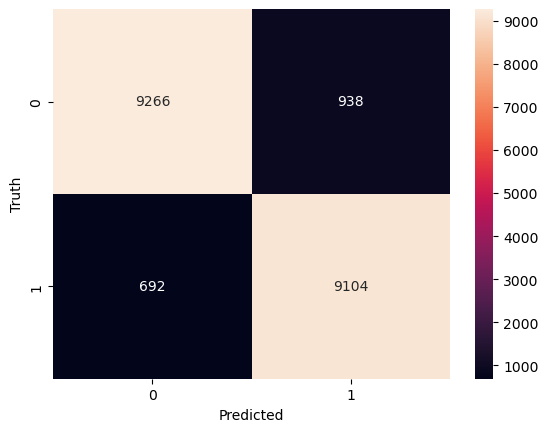

In [9]:
evaluate(model, X_valid, y_valid)

Our accuracy, f1 score, precision, recall and ROC AUC are giving us good scores on the evaluation set. Indeed, we have more than 90% for each scores.  

The precision and the recall are around 90% and 92%. 
This precision score means that if the model predict that the polarity value is 1, it is correct in 90% of the cases.  
This recall score means that if the polarity value is 1, the model predict it correctly in 92% of the cases.  
The f1 score is the harmonic mean of the precision and the recall. It is a good indicator of the model performance to consider the precision and the recall.

## Pipeline creation

When we have a model working well on the evaluation set, we can create a pipeline that first vectorize the text and then use the model.

In [10]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=list(french_stopwords))),
    ('model', LogisticRegression(max_iter=500, random_state=42))
])
pipe

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['parfois', 'au', 'celui-ci', 'eux',
                                             'quelconque', 'souvent',
                                             'première', 'huit', 'suffisant',
                                             "quelqu'un", 'sept', 'or',
                                             'celle-ci', 'on', 'ne',
                                             'egalement', 'tenant',
                                             'anterieure', 'le', 'notamment',
                                             'seize', 'plutot', 'devers', 'me',
                                             'peuvent', 'serait', 'devant',
                                             'vos', 'celle', 'peut', ...])),
                ('model', LogisticRegression(max_iter=500, random_state=42))])

Our pipeline can be used to train the model on the whole training set, and then use it to predict the polarity of the test set.

In [11]:
pipe.fit(df['review'], df['polarity'])

/Users/deronsart/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['parfois', 'au', 'celui-ci', 'eux',
                                             'quelconque', 'souvent',
                                             'première', 'huit', 'suffisant',
                                             "quelqu'un", 'sept', 'or',
                                             'celle-ci', 'on', 'ne',
                                             'egalement', 'tenant',
                                             'anterieure', 'le', 'notamment',
                                             'seize', 'plutot', 'devers', 'me',
                                             'peuvent', 'serait', 'devant',
                                             'vos', 'celle', 'peut', ...])),
                ('model', LogisticRegression(max_iter=500, random_state=42))])

In [12]:
y_pred = pipe.predict(df_valid['review'])
y_pred.shape

(20000,)

Accuracy: 0.9185
F1: 0.9178344591188627
Precision: 0.9065923122883888
Recall: 0.9293589220089833
ROC AUC: 0.9187170933055501


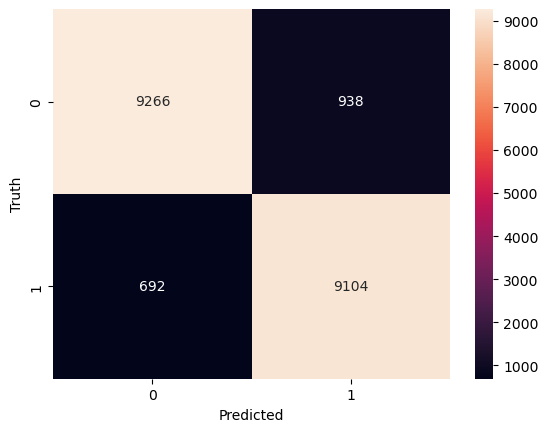

In [13]:
evaluate(pipe, df_valid['review'], y_valid)

We have the exact same scores on the evaluation set than before, showing us that our pipeline is working well.

## Experimenting with different models and hyperparameters

To get a better model we can try different models and hyperparameters.

First, we can use a grid search to find the optimal hyperparameters for a Logistic Regression model.

In [14]:
params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

gridsearch_lr = GridSearchCV(LogisticRegression(max_iter=500, solver='liblinear', random_state=42), params, cv=5)
gridsearch_lr.fit(X_train, y_train)
gridsearch_lr.best_params_

{'C': 1, 'penalty': 'l2'}

Accuracy: 0.91845
F1: 0.9177881949695046
Precision: 0.9065020412227422
Recall: 0.9293589220089833
ROC AUC: 0.9186680929135469


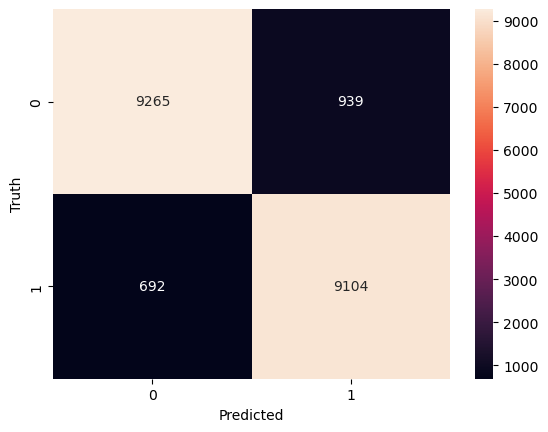

In [15]:
evaluate(gridsearch_lr, X_valid, y_valid)

The best Logistic Regression model has a C value of 1 and a penalty of l2.  
The scores are equivalent than before, so it seems like we can't get better results with a Logistic Regression model.